![alt text](img/env_setting.png "Title")


# We set a environment setting based on the image


In [33]:
import numpy as np
import random
class Grid_game(object):
    def __init__(self,grid_x,grid_y,initial_pos=[2,0],TERMIN_STATE_POS =[[0,0],[3,3]]):
        
        self.initial_pos=initial_pos
        self.TERMINAL_STATE_POS=TERMIN_STATE_POS
        self.grid_x=grid_x
        self.grid_y=grid_y
        
        self.reset()
        
        
        self.policy=np.zeros((4,grid_x,grid_y))+0.25
        for i in self.TERMINAL_STATE_POS:
            self.current_state[i[0]][i[1]]=-1
            self.policy[0:4,i[0],i[1]]=0
            
        self.vst=np.zeros((grid_x,grid_y))   #Action State Value
        
        self.ast=np.zeros((4,grid_x,grid_y))
        
        self.fix_reward_val=-1
        
        class Agent(object):
            def __init__(self,initial_pos,max_grid=grid_x):
                self.oldpos=initial_pos[:]
                self.curpos=initial_pos[:]
                self.max_grid=max_grid
            def north(self):
                self.curpos[0]-=1
            def south(self):
                self.curpos[0]+=1
            def east(self):
                self.curpos[1]+=1
            def west(self):
                self.curpos[1]-=1
                
        self.grid_x=grid_x
        self.grid_y=grid_y
        self.player=Agent(self.initial_pos)        
        self.update_state()
        self.state=False
    def reset(self):
        self.current_state=np.zeros((self.grid_x,self.grid_y))
        
    def update_state(self):
        self.reset()
        self.current_state[self.player.curpos[0]][self.player.curpos[1]]=1
    def set_pos(self,y,x,*args):
        self.player.curpos=[y,x]
        self.update_state()
        self.state=self.end_condition()
    def check_valid(self):
        if self.player.curpos[0]==self.grid_y:
            self.player.curpos[0]=self.grid_y-1
        if self.player.curpos[0]==-1:
            self.player.curpos[0]=0
        if self.player.curpos[1]==self.grid_x:
            self.player.curpos[1]=self.grid_x-1
        if self.player.curpos[1]==-1:
            self.player.curpos[1]=0
    def end_condition(self):
        for state_pos in self.TERMINAL_STATE_POS:
            if self.player.curpos== state_pos:
                return True
        return False
    def transition(self,action=None):

        move = {  0: self.player.north,
                          1: self.player.south,
                        2:self.player.east,
                        3:self.player.west}
        if action==None:

            y,x=self.player.curpos
            action_index=np.random.choice(4, p=self.policy[0:4,y,x])
            self.player.oldpos=self.player.curpos
            move[action_index]()
            action=action_index
        else:
            move[action]()
        self.check_valid()
        self.update_state()
        self.state=self.end_condition()
        return self.state,self.player.curpos,self.fix_reward_val,action
            
        
    def get_asv():
        return self.ast
    def get_vst():
        return self.vst

In [34]:
width,height=4,4

In [35]:
grid=Grid_game(width,height)

In [36]:
grid.ast

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

[0.25 0.25 0.25 0.25]


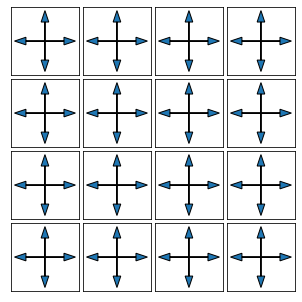

In [88]:

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()







##Measure vst strength:
arrowdir = {  0: np.array((0,1.0)),
                          1: np.array((0,-1.0)),
                        2: np.array((1,0)),
                        3: np.array((-1,0))}

plt.figure(figsize=(4, 4))
axes=0
for y in range(height):
    for x in range(width):
        axes+=1
        value=[]
        for i in range(num_action):
                    
            
            grid.set_pos(y,x)
            _,pos,_,_=grid.transition(i)
            value.append((grid.vst[pos[0],pos[1]]))
        value=softmax(value)
        
        plt.subplot(height, width, axes)
        plt.xticks([])
        plt.yticks([])
        max_val=np.max(value)
        
        plt.xlim([-max_val-0.2, max_val+0.2])
        plt.ylim([-max_val-0.2, max_val+0.2])
        for i in range(4):
            magnitude=arrowdir[i]*value[i]
            plt.arrow(0,0,magnitude[0],magnitude[1],head_width=0.1)
        
plt.tight_layout(0)
plt.show()





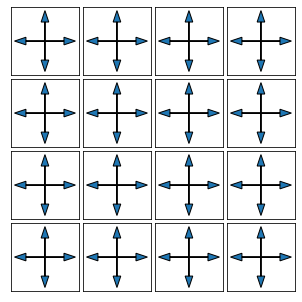

In [93]:
plt.figure(figsize=(4, 4))
axes=0
for y in range(height):
    for x in range(width):
        axes+=1
        value=[]
        for i in range(num_action):
                    
            
            grid.set_pos(y,x)
            value.append((grid.ast[0][pos[0]][pos[1]]))
        value=softmax(value)
        plt.subplot(height, width, axes)
        plt.xticks([])
        plt.yticks([])
        max_val=np.max(value)
        
        plt.xlim([-max_val-0.2, max_val+0.2])
        plt.ylim([-max_val-0.2, max_val+0.2])
        for i in range(4):
            magnitude=arrowdir[i]*value[i]
            plt.arrow(0,0,magnitude[0],magnitude[1],head_width=0.1)
        
plt.tight_layout(0)
plt.show()

In [6]:

def drawarrow(origin_pos,action):
    
    return None


#Set Arrow by VST



#Set Arrow by AST